# Neuron "from scratch"

In this exercise we will recode am artificial neuron. This will allow you to see more precisely how neural networks work.

In [1]:
%%capture
!pip install s3fs

1. Import `pandas`, `numpy` and `matplotlib.pyplot` :

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

An artificial neuron consists of a weighted sum of the inputs plus a bias which are then switched to a non-linear function or activation function.

### Activation function

We are in the case of a binary classification. We will therefore use the **sigmoid** whose formula is as follows:

$$
\sigma(x)=\frac{1}{1 + e^{- x}}
$$

2. Using the above formula, complete the following function:

In [3]:
def sigmoid(x):
    ### TO YOU ###
    ##############
    return 1 / (1 + np.exp(-x))

3. We're going to need the derivative of the sigmoid with the formula below. Complete the following function: 

$$
\frac{\partial \sigma}{\partial x}(x) = \sigma(x)\cdot(1-\sigma(x))
$$

In [4]:
def d_sigmoid(x):
    ### TO YOU ###
    ##############
    return sigmoid(x)*(1 - sigmoid(x))

4. Let's visualize this function. To do this, create a variable `val_x` containing values from `-10` to `10` with a step size of `0.1` (look at `np.arange` for example). Calculate the corresponding values with your sigmoid function and its derivative. Display it all!

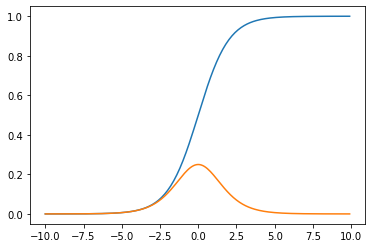

In [5]:
val_x = np.arange(-10.0, 10.0, 0.1)
plt.plot(val_x, sigmoid(val_x))
plt.plot(val_x, d_sigmoid(val_x))
plt.show()

### Forward propagation

This phase corresponds to the prediction phase of the neuron. We're going to cross the neuron to calculate its output.

The general formula is given by:

$$
Z = X \cdot w + b
\\
A = sigmoid(Z)
$$

$Z$ represents the weighted sum of the neuron's inputs and $A$ the neuron's output (i.e. after passing through the activation function).

5. Implement the `forward_propagation` function from the above formula:

In [6]:
def forward_propagation(inputs, weights, bias):
    ### TO YOU ###
    ##############
    return sigmoid(np.dot(inputs, weights) + bias)

In [102]:
inputs = np.array([[1, 2, 3],
                   [-1, -2, -3]])
weights = np.array([0.1, 0.2, 0.3])
bias = 1
pred = forward_propagation(inputs = inputs, weights = weights, bias = bias)

In [8]:
pred

array([0.9168273 , 0.40131234])

### Backward propagation

Once the neuron has made a prediction, we will look at the error it made and correct the parameters accordingly.

This is done in two phases:

- calculating partial derivatives,
- updating the parameters.

We are going to use the MSE cost function, whose formula is as follows:

$$
MSE = \frac{1}{N}\sum_{j=1}^{N}(\hat{y_j} - y_j)^2
$$

6. Implement the following cost function:

In [9]:
def cost(predicted, observed):
    ### TO YOU ###
    return np.mean((predicted - observed)**2)

In [10]:
obs = [1, 0]
cost(pred, obs)

0.0839846457940445

In [11]:
np.sqrt(cost(pred,obs))

0.2898010451914287

We will then take the partial derivative of the cost according to the parameters.
$$loss = cost(\sigma(z), y)$$

Thanks to the _"chain rule"_, we will be able to derive this in the following way:

$$\frac{\partial cost}{\partial z} = \frac{\partial cost}{\partial pred} \times \frac{\partial pred}{\partial z}
$$

where:

$$
\frac {\partial cost}{\partial pred} = \frac{2}{N}\sum_{i=1}^N(pred_i - y_i)
\\
\frac {\partial pred}{\partial z} = \frac{\partial \sigma}{\partial z}(z) = \sigma(z) \times (1 - \sigma(z)) = pred \times (1 - pred)
$$

The _"chain rule"_ can be represented by:
$$\left(u\left(v\left(x\right)\right)\right)' = v'(x) . u'(v(x))$$

Here,
$$cost(x) = u(x)$$
$$pred = v(z) = \sigma(z)$$

7. From the above steps, implement the following function:

In [98]:
def backward_propagation(predictions, observed):
    ### TO YOU ###
    ##############
    d_sigmoid = (2 / len(predictions)) * (predictions - observed)
    dpred_dz = predictions * (1 - predictions)
    return d_sigmoid * dpred_dz

In [99]:
update = backward_propagation(pred, obs)
update

array([-0.00634233,  0.0964196 ])

Then we update the weights simultaneously as follows:

$$
weights =: weights - \gamma (\frac {\partial cost}{\partial pred} \times \frac {\partial pred}{\partial z} \times \frac {\partial z}{\partial w})
\\
bias =: bias - \gamma (\frac {\partial cost}{\partial pred} \times \frac {\partial pred}{\partial z})
$$

**NB:**
$$\frac{\partial z}{\partial w} = X$$
8. Complete the function to update the weights :

In [100]:
def update_parameters(weights, bias, update, inputs, lr=0.05):
    ### TO YOU ### 
    ##############

    weights -= lr * np.dot(inputs.T, update)
    bias -= lr * np.sum(update, axis = 0)
    return weights, bias

In [103]:
w, b = update_parameters(weights, bias, update, inputs)

In [104]:
p = forward_propagation(inputs=inputs, weights=w, bias=b)

In [105]:
cost(p,obs)

0.07643595088981639

In [106]:
np.sqrt(cost(p,obs))

0.27647052445028636

### Training

We now have everything we need to train our neuron. We need to initialize the parameters and bias.

9. Complete the following function using `np.random.rand` to initialize the parameters and bias:

In [107]:
def init_weights(input_features):
    ### A VOUS ###
    ##############
    weights = np.random.rand(input_features, 1) * 0.01
    bias = np.random.rand(1)
    return weights, bias

That's it! We're in. We're going to implement our neuron drive function. Remember the order of operations:

1. Forward propagation
2. backward propagation
3. Updating parameters

And this for a determined number of iterations until convergence.

10. Implement the `training` function below:

In [108]:
def training(inputs, labels, epochs=100):
    ### A VOUS ###
    # print the loss value after each gradient update
    ##############
    cost_hist = []
    weights, bias = init_weights(inputs.shape[1])
    for i in range(epochs):
        p = forward_propagation(inputs, weights, bias)
        current_cost = cost(p, labels)
        cost_hist.append(cost(p, labels))
        update = backward_propagation(p, labels)
        weights, bias = update_parameters(weights, bias, update, inputs)
        print("Epoch {}/{}: loss - {}".format(i + 1, epochs, current_cost))
    return cost_hist, weights, bias

We will train our neuron on a small dataset from the [MNIST](http://yann.lecun.com/exdb/mnist/). This is a historical dataset that contains images of handwritten numbers. Each of the images is in black and white and has a size (28, 28).

11. Load the file `src/train.csv` :

In [80]:
df = pd.read_csv('s3://full-stack-bigdata-datasets/Deep learning Images processing/Introduction aux réseaux de neurones/Exercices/src/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


It's a binary classification

In [22]:
df.label.unique()

array([1, 0])

The data values are between 0 and 255 and should be scaled between 0 and 1.

In [23]:
df.drop(['label'], axis=1).values.min()

0

In [24]:
df.drop(['label'], axis=1).values.max()

255

12. Separate the `label` column into a `Y` variable and the rest into an `X` variable and scale X between 0 and 1:

In [109]:
target = "label"
X = df[[col for col in df.columns if col != target]] / 255.0
y = df[target]
print(X.shape, y.shape)

(8816, 784) (8816,)


13. Take the opportunity to look at what these pictures look like:

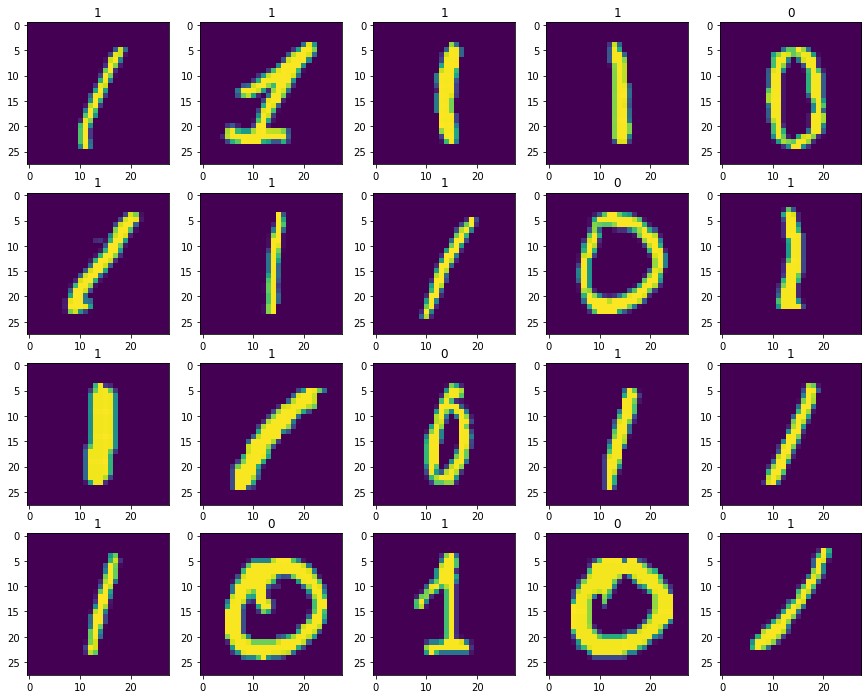

In [85]:
def plot_numbers(df, target, num_sample = 20, num_cols = 5):
    
    datas, pixels = df.shape
    
    rand_samp = df.sample(n=num_sample, random_state=1)
    
    rand_sample= pd.DataFrame({"images": rand_samp.apply(lambda x: x.values.reshape(int(pixels**0.5), int(pixels**0.5)), axis=1).sort_index(), 
                               "target": target[target.index.isin(rand_samp.index)]})
    
    num_lines = int(num_sample / num_cols) + int(num_sample%num_cols != 0)
    
    f, axes = plt.subplots(num_lines, num_cols,figsize=(15,3*num_lines))

    for idx, ax in enumerate(axes.flat):
        row = rand_sample.iloc[idx, :]
        ax.imshow(row["images"])
        ax.set_title(row["target"])

    plt.show()
    
plot_numbers(X, y)

14. Use `training` to train your neuron!

In [110]:
# check the loss value before training
weights, bias = init_weights(X.shape[1])
cost(forward_propagation(X.values, weights, bias), y.values.reshape((-1, 1)))

0.3097018315121298

In [ ]:
# look the percentage of 1 in the dataset

array([0.53130672])

In [111]:
# train your neuron with training function
cost_hist, weights, bias = training(X.values, y.values.reshape((-1, 1)), epochs=50)

Epoch 1/50: loss - 0.3285319114381904
Epoch 2/50: loss - 0.28331633604086454
Epoch 3/50: loss - 0.230069338621517
Epoch 4/50: loss - 0.1802954104994869
Epoch 5/50: loss - 0.14440019622121422
Epoch 6/50: loss - 0.12139669076663633
Epoch 7/50: loss - 0.10605769428879583
Epoch 8/50: loss - 0.09493525916164702
Epoch 9/50: loss - 0.08630239074193376
Epoch 10/50: loss - 0.07928835411217261
Epoch 11/50: loss - 0.07341646407198606
Epoch 12/50: loss - 0.06840016691908961
Epoch 13/50: loss - 0.06405226366198388
Epoch 14/50: loss - 0.06024205732471914
Epoch 15/50: loss - 0.05687360392057141
Epoch 16/50: loss - 0.0538738184807298
Epoch 17/50: loss - 0.051185490155923295
Epoch 18/50: loss - 0.04876290842246034
Epoch 19/50: loss - 0.046568969597277604
Epoch 20/50: loss - 0.04457317407885114
Epoch 21/50: loss - 0.04275018891417178
Epoch 22/50: loss - 0.0410787860492923
Epoch 23/50: loss - 0.03954104002406108
Epoch 24/50: loss - 0.03812171057331234
Epoch 25/50: loss - 0.036807760427113735
Epoch 26/50:

In [95]:
# check the loss value after training
cost(forward_propagation(X.values, weights, bias), y.values.reshape((-1, 1))) 

0.020645191819495055

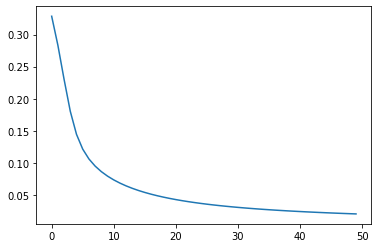

In [112]:
# plot the history of the loss values
plt.plot(range(50), cost_hist)
plt.show()

Congratulations! You have coded your first neuron!

Of course it is very perfectible. We invite you to come back to it as long as you want and improve it. For example in :

- using Python classes
- adding layers of neurons
- creating other activation functions
- ...